<a href="https://colab.research.google.com/github/bala-codes/SIMPLE-SPEECH-RECOGNITION-/blob/master/codes/Speech%20To%20Text%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run from here

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

[ 0.00042725 -0.00021362 -0.00042725 ...  0.00057983  0.00061035
  0.00082397]
16000
16000


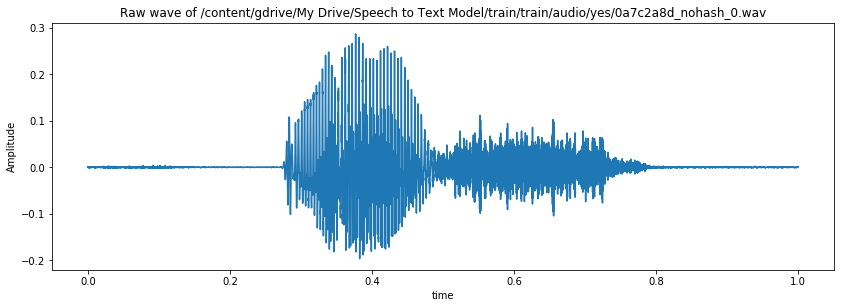

In [ ]:
train_audio_path = '/content/gdrive/My Drive/Speech to Text Model/train/train/audio/'
samples, sample_rate = librosa.load( train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)

print(samples)
print(len(samples))
print(sample_rate)

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path+'yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [ ]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate,"Hz")

#frequency = [8000,10000,12000,14000,16000]

#samples = librosa.resample(samples, sample_rate, 14000)
#ipd.Audio(samples, rate=14000)

# Try to hear at different frequencies, 8000Hz is the best audible range for human

16000 Hz


In [ ]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

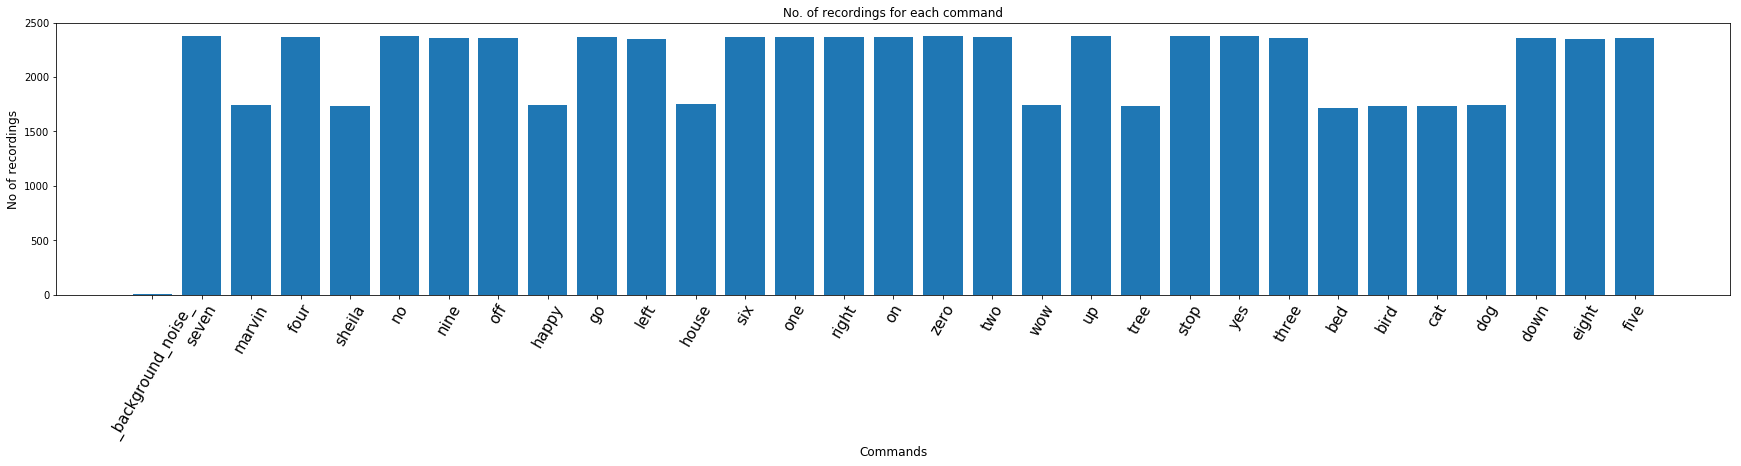

In [ ]:
train_audio_path = '/content/gdrive/My Drive/Speech to Text Model/train/train/audio'

labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go" ,"sheila" , "dog" , "marvin" , "six" , "bird" , "nine" , "house" ,
        "wow" , "happy" , "cat" , "four" , "three" , "bed" , "tree" , "eight" , "two" , "five" , "stop" , "seven" , "one" , "zero"]

In [ ]:
duration_of_recordings=[]

dummy_labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
for label in dummy_labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
        #print(samples,sample_rate)
plt.hist(np.array(duration_of_recordings))

In [ ]:
#We see that some of the recording has duration less than 1 second (0.8 sec,0.9 sec) and the sampling rate is too high which cannot be processed due to player constraints. So we remove them using pre processing.


In [ ]:
%%time
'''
import time
start = time.time()


all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

end = time.time()
duration = end - start
print ('\n time ellapsed to run this code %0.2f seconds (%0.1f minutes)'%(duration, duration/60))'''

yes
no
up
down
left
right
on
off
stop
go
sheila
dog
marvin
six
bird
nine
house
wow
happy
cat
four
three
bed
tree
eight
two
five
stop
seven
one
zero

 time ellapsed to run this code 18667.44 seconds (311.1 minutes)


In [ ]:
'''import numpy as np
np.save('/content/gdrive/My Drive/Speech to Text Model/all_wave.npy', all_wave)'''

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'

In [ ]:
all_labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'on', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'off', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'go', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'sheila', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'marvin', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'six', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'nine', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'wow', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'eight', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'seven', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero', 'zero']
print(len(all_labels))


60426


In [ ]:
# Numpy Loader for label and waves

from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
all_labels = np.load('/content/gdrive/My Drive/Machine Learning Projects/SPEECH RECOGNITION - SIMPLE WORDS/SOURCE CODES AND DATASET/PACKAGE 1 - SOURCE CODES AND FILES/all_label.npy')
y=le.fit_transform(all_labels)
classes= list(le.classes_)
print(classes)
print(np.unique(y))

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [ ]:
from keras.utils import np_utils

y=np_utils.to_categorical(y, num_classes=len(classes))
y

Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
#Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:
# Numpy loader for label and wave
%%time

import numpy as np
all_waves = np.load('/content/gdrive/My Drive/Machine Learning Projects/SPEECH RECOGNITION - SIMPLE WORDS/SOURCE CODES AND DATASET/PACKAGE 1 - SOURCE CODES AND FILES/all_wave.npy')
all_waves = np.array(all_waves).reshape(-1,8000,1)
print(all_waves.shape)

(60426, 8000, 1)
CPU times: user 381 ms, sys: 1.33 s, total: 1.71 s
Wall time: 10.7 s


In [ ]:
all_waves[0:3]

array([[[ 1.0164937e-03],
        [-5.4757897e-04],
        [-2.7395901e-03],
        ...,
        [-2.7386334e-03],
        [ 1.8965872e-03],
        [ 4.0870919e-03]],

       [[-5.2110577e-04],
        [-1.0736766e-03],
        [ 1.8879722e-04],
        ...,
        [ 8.7861874e-04],
        [ 3.4743574e-05],
        [ 3.9058703e-04]],

       [[-3.2717951e-02],
        [-5.0164152e-02],
        [-4.2022709e-02],
        ...,
        [-4.7485247e-02],
        [-4.4779964e-02],
        [-5.0245985e-02]]], dtype=float32)

In [ ]:
%%time
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_waves),np.array(y),stratify=y,test_size = 0.2,random_state=77,shuffle=True)

CPU times: user 1.78 s, sys: 376 ms, total: 2.16 s
Wall time: 2.16 s


In [ ]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
K.clear_session()
print("Backend is ",keras.backend.backend())



model = Sequential()
model.add(Conv1D(filters=8, kernel_size=15, activation='relu', input_shape=(8000, 1)))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=11, activation='relu')) 
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=8, activation='relu')) 
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=9, activation='relu')) 
model.add(Conv1D(filters=64, kernel_size=9, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(labels), activation='softmax'))
model.summary()

Backend is  tensorflow
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7986, 8)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2642, 16)          2832      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 880, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (N

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.0001) 
mc = ModelCheckpoint('/content/gdrive/My Drive/Speech to Text Model/models/audiomodelx64f.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
%%time
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], validation_data=(x_val,y_val))

Train on 48340 samples, validate on 12086 samples
Epoch 1/100
48340/48340 [==============================] - 49s 1ms/step - loss: 3.0141 - acc: 0.1428 - val_loss: 2.1403 - val_acc: 0.3420

Epoch 00001: val_acc improved from -inf to 0.34197, saving model to /content/gdrive/My Drive/Speech to Text Model/models/audiomodelx64f.h5
Epoch 2/100
48340/48340 [==============================] - 47s 969us/step - loss: 1.9253 - acc: 0.4043 - val_loss: 1.5088 - val_acc: 0.5326

Epoch 00002: val_acc improved from 0.34197 to 0.53260, saving model to /content/gdrive/My Drive/Speech to Text Model/models/audiomodelx64f.h5
Epoch 3/100
48340/48340 [==============================] - 47s 969us/step - loss: 1.4577 - acc: 0.5479 - val_loss: 1.1818 - val_acc: 0.6284

Epoch 00003: val_acc improved from 0.53260 to 0.62841, saving model to /content/gdrive/My Drive/Speech to Text Model/models/audiomodelx64f.h5
Epoch 4/100
48340/48340 [==============================] - 47s 969us/step - loss: 1.2042 - acc: 0.6302 - v

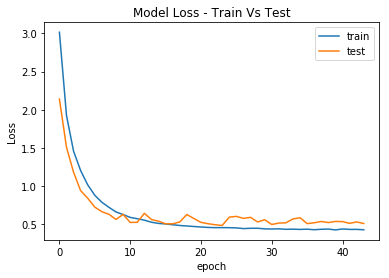

In [ ]:
from matplotlib import pyplot 
pyplot.title('Model Loss - Train Vs Test')
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
plt.ylabel('Loss')
plt.xlabel('epoch')
pyplot.legend() 
pyplot.show()


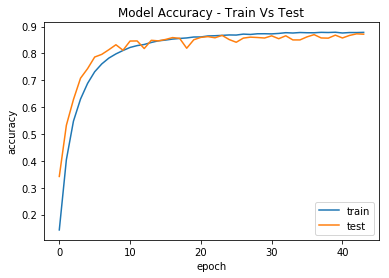

In [ ]:
from matplotlib import pyplot 
pyplot.title('Model Accuracy - Train Vs Test')
pyplot.plot(history.history['acc'], label='train') 
pyplot.plot(history.history['val_acc'], label='test') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
pyplot.legend() 
pyplot.show()

In [ ]:
from keras.models import load_model
model=load_model('/content/gdrive/My Drive/Speech to Text Model/models/model-026-0.894353-0.872580.h5')

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(-1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random

for i in range(0,10):
  index=random.randint(0,len(x_val)-1)
  print(index)
  samples=x_val[index].ravel()
  print(samples)

  print("Audio:",classes[np.argmax(y_val[index])])
  ipd.Audio(samples, rate=8000)
  print("Text:",predict(samples))

711
[-0.00218243 -0.00348608 -0.00601601 ...  0.00846912  0.00604545
  0.00477504]
Audio: two
Text: two
10988
[ 0.00069151  0.00189759  0.00217076 ... -0.00421691 -0.00287634
 -0.00178862]
Audio: four
Text: four
7516
[ 1.7287245e-04 -1.4752171e-04 -3.5940143e-04 ... -4.6668306e-06
 -2.4249141e-04 -2.2327693e-04]
Audio: eight
Text: eight
2755
[-0.00178298 -0.00231946 -0.00221203 ...  0.00254903  0.00165399
  0.00350508]
Audio: happy
Text: happy
6065
[-8.2108536e-06 -2.5224464e-04 -2.0712828e-04 ... -2.2513239e-04
  1.6872717e-04 -1.2339425e-04]
Audio: eight
Text: eight
3352
[0.00031757 0.00065866 0.00068367 ... 0.00062446 0.00043696 0.00059192]
Audio: stop
Text: stop
875
[-0.00102391 -0.00156687 -0.00153564 ...  0.00035417  0.00318396
  0.00365655]
Audio: dog
Text: dog
9538
[0.00071545 0.00142907 0.00130703 ... 0.00174565 0.00168284 0.00158062]
Audio: nine
Text: nine
1641
[-8.1102999e-06 -3.7999253e-05  5.5173850e-06 ...  1.4468590e-04
  3.4793669e-05  1.9462111e-04]
Audio: happy
Text: 

[ 0.00061035 -0.00091553  0.00045776 ...  0.00836182  0.00488281
  0.00360107]
16000


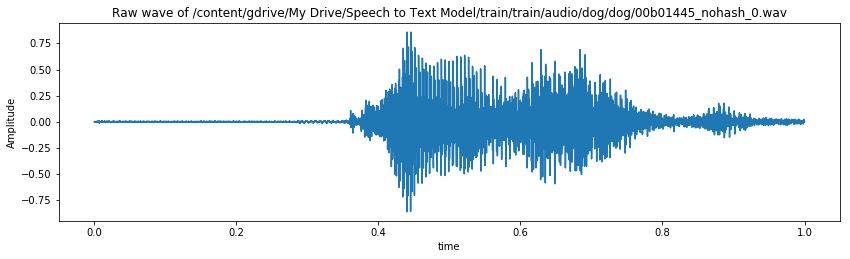

In [ ]:
train_audio_path = '/content/gdrive/My Drive/Speech to Text Model/train/train/audio/'
samples, sample_rate = librosa.load( train_audio_path+'dog/00b01445_nohash_0.wav', sr = 16000)
print(samples)
print(sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path+'dog/dog/00b01445_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [ ]:
os.listdir('/content/gdrive/My Drive/Speech to Text Model/train/train/audio/')
filepath='/content/gdrive/My Drive/Speech to Text Model/train/train/audio/dog'

#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + '00b01445_nohash_0.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

predict(samples)

'dog'

In [ ]:
# Predict the user given sample

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 00176480_nohash_0.wav to 00176480_nohash_0 (1).wav


In [ ]:
print(uploaded)

{'00176480_nohash_0.wav': b'RIFF$}\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00}\x00\x00\x03\x00\x01\x00\x06\x00\x06\x00\xff\xff\x01\x00\x08\x00\x03\x00\xfd\xff\xfe\xff\x03\x00\t\x00\x04\x00\xf7\xff\xf9\xff\x05\x00\x06\x00\x01\x00\x03\x00\x00\x00\xfb\xff\x05\x00\x0e\x00\x03\x00\xfa\xff\x01\x00\t\x00\x10\x00\x12\x00\x0b\x00\x03\x00\x03\x00\xff\xff\xf7\xff\xf8\xff\xfc\xff\xfa\xff\xfb\xff\xfe\xff\xfc\xff\xf8\xff\xf4\xff\xf1\xff\xf7\xff\xff\xff\xfc\xff\xf7\xff\xfb\xff\x00\x00\xff\xff\xfd\xff\xf7\xff\xf4\xff\xfc\xff\x02\x00\xff\xff\xfd\xff\x01\x00\x06\x00\x05\x00\x02\x00\xfe\xff\xff\xff\x01\x00\x00\x00\x01\x00\x08\x00\x05\x00\xff\xff\x06\x00\x0b\x00\x01\x00\xf6\xff\xf8\xff\x01\x00\x04\x00\x00\x00\xfa\xff\xf9\xff\xfb\xff\xf4\xff\xf0\xff\xf9\xff\x02\x00\x05\x00\x07\x00\x05\x00\x00\x00\x01\x00\x04\x00\x01\x00\x02\x00\x0b\x00\x0b\x00\x02\x00\x00\x00\x06\x00\x08\x00\x05\x00\x07\x00\n\x00\x07\x00\x06\x00\x03\x00\xfe\xff\xfd\xff\x00\x00\x00\x00\

In [ ]:
#reading the voice commands # upload your audio content here
print("\t  Hear the Given Sample")
samples, sample_rate = librosa.load('/content/00176480_nohash_0.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

	  Hear the Given Sample


In [ ]:
print("The given piece of sound says :",predict(samples))

The given piece of sound says : bed
